In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
new_data = pd.read_csv('new_dataset2.csv')
new_data.dropna(inplace = True)
new_data= new_data.drop(new_data.columns[[2,3]],axis=1)

In [53]:
new_data.rename(columns = {
    'Favorite food names': 'Fav Food',
    'Food flavor': 'Flavor',
    'Favorite food in summer/winter/rainy season' : 'Fav Food in summer',
    'Favourite food in rainy season': 'Fav Food in rainy'
}, inplace = True)
new_data.head()

,Gender,Fav Food,Fav Food in summer,Flavor,Fav Food in rainy
1,Male,"Pasta, Pizza, Kacchi, Chinese, Traditional, Ri...",Khacchi,Spicy,"Pasta, Pizza"
2,Male,Burger,Winter,Sweet,Mango
3,Female,Kacchi Biriyani,Kacchi Biriyani,Spicy,Khicuri with Hilsha Fry
5,Male,"Chinese, Pizza, Pasta, Noodles, Polao, Roast","cold coffee, pasta, soup, khicuri",Sweet,"Khicuri, Pasta, Pizza, Polao"
6,Female,chinese,pizza/biriyani/khichuri,Spicy,Khichuri


In [54]:
new_data['Fav Food in winter'] = new_data['Fav Food in summer']
new_data.head()

,Gender,Fav Food,Fav Food in summer,Flavor,Fav Food in rainy,Fav Food in winter
1,Male,"Pasta, Pizza, Kacchi, Chinese, Traditional, Ri...",Khacchi,Spicy,"Pasta, Pizza",Khacchi
2,Male,Burger,Winter,Sweet,Mango,Winter
3,Female,Kacchi Biriyani,Kacchi Biriyani,Spicy,Khicuri with Hilsha Fry,Kacchi Biriyani
5,Male,"Chinese, Pizza, Pasta, Noodles, Polao, Roast","cold coffee, pasta, soup, khicuri",Sweet,"Khicuri, Pasta, Pizza, Polao","cold coffee, pasta, soup, khicuri"
6,Female,chinese,pizza/biriyani/khichuri,Spicy,Khichuri,pizza/biriyani/khichuri


In [55]:
new_data = new_data.stack().str.replace('/',',').unstack()
new_data['Fav Food'] = new_data['Fav Food'].str.split(',').str[0]
new_data['Fav Food in summer'] = new_data['Fav Food in summer'].str.split(',').str[0]
new_data['Fav Food in winter'] = new_data['Fav Food in winter'].str.split(',').str[0]
new_data['Fav Food in rainy'] = new_data['Fav Food in rainy'].str.split(',').str[0]
new_data.head()

,Gender,Fav Food,Fav Food in summer,Flavor,Fav Food in rainy,Fav Food in winter
1,Male,Pasta,Khacchi,Spicy,Pasta,Khacchi
2,Male,Burger,Winter,Sweet,Mango,Winter
3,Female,Kacchi Biriyani,Kacchi Biriyani,Spicy,Khicuri with Hilsha Fry,Kacchi Biriyani
5,Male,Chinese,cold coffee,Sweet,Khicuri,cold coffee
6,Female,chinese,pizza,Spicy,Khichuri,pizza


In [56]:
new_data = new_data.stack().str.lower().unstack()
new_data.head()

,Gender,Fav Food,Fav Food in summer,Flavor,Fav Food in rainy,Fav Food in winter
1,male,pasta,khacchi,spicy,pasta,khacchi
2,male,burger,winter,sweet,mango,winter
3,female,kacchi biriyani,kacchi biriyani,spicy,khicuri with hilsha fry,kacchi biriyani
5,male,chinese,cold coffee,sweet,khicuri,cold coffee
6,female,chinese,pizza,spicy,khichuri,pizza


In [58]:
new_data.replace({
    'khacchi': 'biriyani',
    'kacchi biriyani': 'biriyani',
    'winter' : 'none',
    'mango' : 'fruits',
    'khicuri with hilsha fry': 'khichuri',
    'khicuri': 'khichuri'
}, inplace = True)
new_data.head()

,Gender,Fav Food,Fav Food in summer,Flavor,Fav Food in rainy,Fav Food in winter
1,male,pasta,biriyani,spicy,pasta,biriyani
2,male,burger,none,sweet,fruits,none
3,female,biriyani,biriyani,spicy,khichuri,biriyani
5,male,chinese,cold coffee,sweet,khichuri,cold coffee
6,female,chinese,pizza,spicy,khichuri,pizza


In [60]:
df = new_data.to_csv('cleanedData.csv', index = 'False')

In [78]:
new_df = pd.read_csv('cleanedData.csv')
new_df['Fav Food'].unique()

array(['pasta', 'burger', 'biriyani', 'chinese', 'pizza', 'icecream',
       'soup', 'chicken', 'none', 'french fries', 'coffee', 'milk',
       'beef', 'fish', 'shawrma', 'italian', 'payes', 'waffle'],
      dtype=object)

In [79]:
new_df.replace({
    'pasta' : 0,
    'burger': 1,
    'biriyani': 2,
    'chinese': 3,
    'pizza': 4,
    'icecream': 5,
    'soup': 6,
    'chicken': 7,
    'khichuri': 8,
    'pitha': 9,
    'none': 10,
    'french fries': 11,
    'coffee': 12,
    'milk': 13,
    'beef': 14, 
    'fish': 15,
    'shawrma': 16,
    'italian': 17,
    'payes': 18,
    'waffle': 19,
    'fruits': 20,
    'cold coffee': 21,
    'tea': 22,
    'curry': 23,
    'rice': 24,
    'momo': 25,
    'juice': 26,
    'faluda': 27,
    'halim': 28,
    'vegetables': 29,
    'spicy muri': 30,
    'pickles': 31,
    'spicy foods': 32
},inplace = True)
new_df.head()

,Gender,Fav Food,summer,Flavor,Fav Food in rainy,winter
0,Male,0,2,Spicy,0,2
1,Male,1,10,Sweet,20,10
2,Female,2,2,Spicy,8,2
3,Male,3,21,Sweet,8,6
4,Female,3,4,Spicy,8,2


In [81]:
new_df['Gender'].replace({
    'Male': 0,
    'Female': 1
}, inplace = True)
new_df.head()

,Gender,Fav Food,summer,Flavor,Fav Food in rainy,winter
0,0,0,2,Spicy,0,2
1,0,1,10,Sweet,20,10
2,1,2,2,Spicy,8,2
3,0,3,21,Sweet,8,6
4,1,3,4,Spicy,8,2


In [83]:
new_df['Flavor'].replace({
    'Spicy': 0,
    'Sweet': 1
}, inplace = True)
new_df.head()

,Gender,Fav Food,summer,Flavor,Fav Food in rainy,winter
0,0,0,2,0,0,2
1,0,1,10,1,20,10
2,1,2,2,0,8,2
3,0,3,21,1,8,6
4,1,3,4,0,8,2


In [84]:
new_df.corr()

,Gender,Fav Food,summer,Flavor,Fav Food in rainy,winter
Gender,1.000000,0.014024,0.123118,0.067767,0.166902,-0.008461
Fav Food,0.014024,1.000000,0.261577,0.096303,0.200230,0.377880
summer,0.123118,0.261577,1.000000,0.076998,0.169545,0.454003
Flavor,0.067767,0.096303,0.076998,1.000000,0.199742,0.062311
Fav Food in rainy,0.166902,0.200230,0.169545,0.199742,1.000000,0.281813
winter,-0.008461,0.377880,0.454003,0.062311,0.281813,1.000000


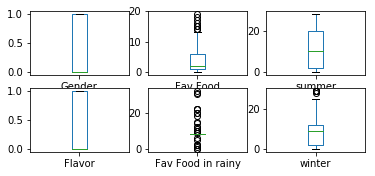

In [88]:
names= ['Gender','Fav Food','summer','Flavor','Fav Food in rainy','winter']
new_df.plot(kind='box', subplots = True, layout=(3,3), sharex = False, sharey = False)
plt.show()

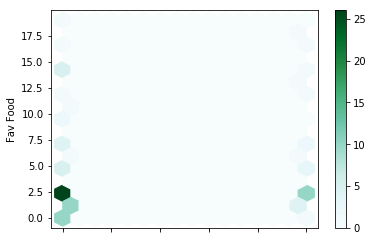

In [94]:
new_df.plot.hexbin(x='Flavor', y= 'Fav Food', gridsize= 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E4E6890>,
      dtype=object)

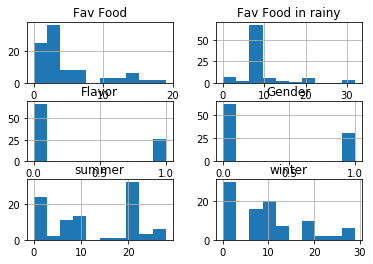

In [95]:
new_df.hist()

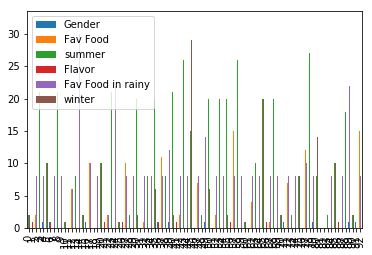

In [96]:
new_df.plot.bar()